<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_11_CNN%EC%8B%A4%EC%A0%84_%EB%9E%9C%EB%93%9C%EB%A7%88%ED%81%AC%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.11 CNN실전 - 랜드마크 이미지

* 날짜:
* 이름:

## 학습내용
    - 랜드마크 데이터를 이용한 적절한 모델을 구축 및 학습한다.

### 소개

인공지능 기반의 컴퓨터 비전 기술 및 서비스 개발에 활용하기 위해 국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### 구축목적
AI 기술 및 응용서비스 개발에 활용가치가 높은 인공지능 학습용 데이터 구축 및 개방, AI응용 서비스 개발
국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### AI허브 링크
https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=56

## 실습
---

#### **데이터로드**
```
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download
```

In [ ]:
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt
To: /content/jejudo.zip
100% 4.35G/4.35G [00:31<00:00, 136MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils, preprocessing, applications

In [ ]:
data_dir = '/content/landmark_jeju8'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 8
IMG_SIZE = 180
SEED = 123


train_gen = ImageDataGenerator(rescale=1.0/255.0,
                              validation_split=0.2,
                              rotation_range=360,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2, 
                              horizontal_flip=True,
                              fill_mode='nearest',
                              brightness_range = [0.7,1.3])

valid_gen = ImageDataGenerator(rescale=1.0/255.0,
                              validation_split=0.2)

train_flow = train_gen.flow_from_directory(data_dir,
                                          target_size=(IMG_SIZE, IMG_SIZE),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical',
                                          seed=SEED,
                                          subset='training'
                                          )
valid_flow = valid_gen.flow_from_directory(data_dir,
                                          target_size=(IMG_SIZE, IMG_SIZE),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical',
                                          seed=SEED,
                                          subset='validation'
                                          )

Found 1065 images belonging to 8 classes.
Found 263 images belonging to 8 classes.


(8, 180, 180, 3) [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


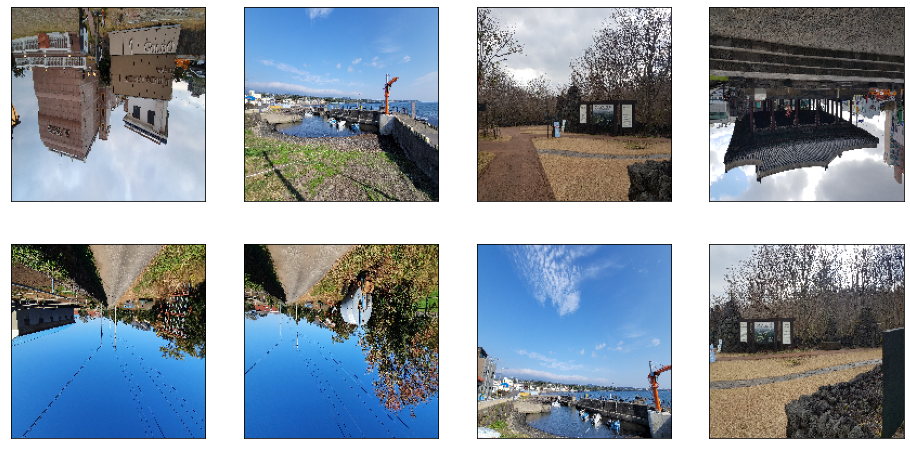

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
for images, labels in valid_flow:
  for i in range(BATCH_SIZE):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.xticks([]);plt.yticks([])
  print(images.shape, labels)
  break

In [ ]:
base_model = applications.EfficientNetB7(weights='imagenet', #이미지넷 데이터로 사전 학습된 학습 파라미터.
                                        include_top=False, # 최상위 층 (flatten이후) 제거. 
                                        input_shape= (IMG_SIZE, IMG_SIZE, 3)
                                        )
base_model.summary()

In [ ]:
def create_model(base_model):
  x = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
  y = base_model(x) # y: (4,4,512)
  y = layers.GlobalAveragePooling2D()(y)
  y = layers.Dropout(0.5)(y)
  y = layers.Dense(8, activation='softmax')(y)
  return models.Model(x, y)


model = create_model(base_model)
base_model.trainable=True
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=2e-5),# 전이학습: 학습률을 작게 설정해주기
              metrics=['acc']
              )
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d_8   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 2560)              0         
                                                                 
 dense_8 (Dense)             (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
_________________________________________

In [ ]:
from tensorflow.keras import optimizers, callbacks

tb = callbacks.TensorBoard(log_dir='/content/drive/MyDrive/work_space/effb7_log',
                           histogram_freq=1)
ckp = callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/work_space/effb7.h5',
                                save_best_only=True,
                                monitor='val_acc')

STEPS_PER_EPOCH = 1065 // BATCH_SIZE
VALIDATION_STEP = 263 // BATCH_SIZE

history = model.fit(train_flow, 
                    epochs=20,
                    validation_data=valid_flow,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEP,
                    shuffle=True,
                    callbacks=[tb, ckp])